# Use Case for Hackathon

### We get a dataset, we have to understand it and get value from it

A school wants to hire us to see whether we are able to understand some problems they believe they are facing. 

Something is going wrong with the performance of the students but they are not able to figure it out and give reasons to it. 

Some parents are very disappointed of the grades of their kids and have complaint continiously to the board of the school. 

Our company is low on budget and we accept the deal even if it is risky, stressful and the money won't cover much of our runaway either but we take what we get. 

## Let's get to it and try to help the School!

### Import dataset and do the first general analysis

In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib inline
import seaborn as sns

In [2]:
url='https://drive.google.com/file/d/1ETCwd-hUZ_qhQX0M0OY6OAddVE4bCSOW/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,address,Year,Age
0,Male,group A,high school,standard,completed,67,67,63,1000,NaN,2023,14.0
1,Female,group D,some high school,free/reduced,none,40,29,55,1001,NaN,2023,17.0
2,Male,group E,some college,free/reduced,none,59,60,50,1002,NaN,2023,14.0
3,Male,group B,high school,standard,none,77,78,68,1003,NaN,2023,17.0
4,Male,group E,associate's degree,standard,completed,78,73,68,1004,NaN,2023,16.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1010 non-null   object 
 1   race/ethnicity               1010 non-null   object 
 2   parental level of education  1010 non-null   object 
 3   lunch                        1010 non-null   object 
 4   test preparation course      1010 non-null   object 
 5   math score                   1010 non-null   int64  
 6   reading score                1010 non-null   int64  
 7   writing score                1010 non-null   int64  
 8   id_student                   1010 non-null   int64  
 9   address                      0 non-null      float64
 10  Year                         1010 non-null   int64  
 11  Age                          943 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 94.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1010 non-null   object 
 1   race/ethnicity               1010 non-null   object 
 2   parental level of education  1010 non-null   object 
 3   lunch                        1010 non-null   object 
 4   test preparation course      1010 non-null   object 
 5   math score                   1010 non-null   int64  
 6   reading score                1010 non-null   int64  
 7   writing score                1010 non-null   int64  
 8   id_student                   1010 non-null   object 
 9   address                      0 non-null      float64
 10  Year                         1010 non-null   int64  
 11  Age                          943 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 94.8+ KB


## What information do we get from this? 

1. Why is student id int? If it is a string. It is not a number

2. We need to inspect all the object columns and check the value counts. What do we discover when we do it? 

3. The distribution of the year column is a bit odd. We need to look more into it. 

4. Do we have duplicates in the dataset?

5. All rows of the column address are missing, maybe we can just delete it

6. The age column has 77 missing values. What should we do with it? 

7. There seems to be values for the math scores higher than 120. Are those outliers? 

### 1. Change type of student id  

In [27]:
# Change from int to string
df['id_student'] = df['id_student'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1010 non-null   object 
 1   race/ethnicity               1010 non-null   object 
 2   parental level of education  1010 non-null   object 
 3   lunch                        1010 non-null   object 
 4   test preparation course      1010 non-null   object 
 5   math score                   1010 non-null   int64  
 6   reading score                1010 non-null   int64  
 7   writing score                1010 non-null   int64  
 8   id_student                   1010 non-null   object 
 9   address                      0 non-null      float64
 10  Year                         1010 non-null   int64  
 11  Age                          943 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 94.8+ KB


### 2. Explore the columns that are objects (string)

In [ ]:
#Select columns that are objects by selecting data types
df.select_dtypes(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,id_student
0,Male,group A,high school,standard,completed,1000
1,Female,group D,some high school,free/reduced,none,1001
2,Male,group E,some college,free/reduced,none,1002
3,Male,group B,high school,standard,none,1003
4,Male,group E,associate's degree,standard,completed,1004
...,...,...,...,...,...,...
1005,female,group D,high school,standard,none,1005
1006,female,group A,bachelor's degree,standard,none,1006
1007,male,group E,some college,standard,completed,1007
1008,male,group D,high school,standard,none,1008


### 3. Seems that the column gender has a lot of versions we are going to have to fix this

In [33]:
#Get unique values from gender colum
df['gender'].unique()
#Evaluate gender column and assign M if male or F if female
# Standardizing the 'Gender' column
df['gender'] = df['gender'].str.strip().str.upper().map({'MALE': 'M', 'FEMALE': 'F', 'male': 'M', 'female': 'F'})
df['gender'].unique()

array(['M', 'F'], dtype=object)

### 4. What may be happening with the year? 

In [ ]:
#Get unique values from Year column
df['Year'].unique()
#Some of the years are wrong. They should be 2023 and not 1990


array([2023, 1990])

### 5. Do we have any duplicates? 

In [ ]:
#find duplicated based on the id_student

duplicates = df[df.duplicated(subset=['id_student'], keep='first')]
print(duplicates)

#Indeed there are 10 duplicates

     gender race/ethnicity parental level of education         lunch  \
1000      M        group A                 high school      standard   
1001      F        group D            some high school  free/reduced   
1002      M        group E                some college  free/reduced   
1003      M        group B                 high school      standard   
1004      M        group E          associate's degree      standard   
1005      F        group D                 high school      standard   
1006      F        group A           bachelor's degree      standard   
1007      M        group E                some college      standard   
1008      M        group D                 high school      standard   
1009      M        group C                some college  free/reduced   

     test preparation course  math score  reading score  writing score  \
1000               completed          67             67             63   
1001                    none          40             29    

### 6.1. Missing values: Remember the column address

In [ ]:
#Find missing values
df.isnull().sum()
#There are missing values on the address and Age fields, address is missing within all the fields

gender                            0
race/ethnicity                    0
parental level of education       0
lunch                             0
test preparation course           0
math score                        0
reading score                     0
writing score                     0
id_student                        0
address                        1010
Year                              0
Age                              67
dtype: int64

### 6.2. What about the missing values of the column Age? 

In [ ]:
#It was checked on the last one, there are 67 missing values

### 7. What is going on with the math scores?

<Axes: xlabel='math score', ylabel='Count'>

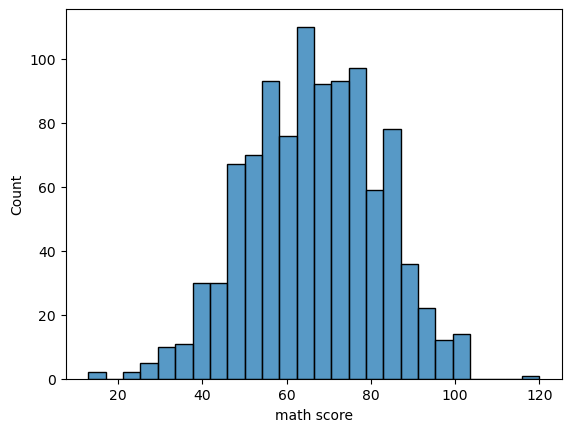

In [52]:
#Plot the distribution of math scores by gender
df.groupby('gender')['math score'].mean()
sns.histplot(df['math score'])

## Do some initial plots? EDA

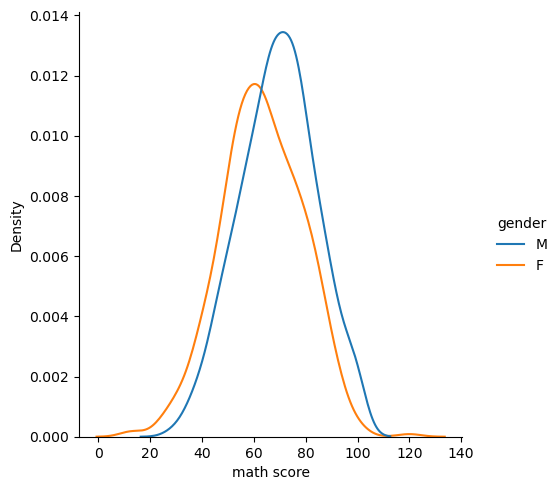

In [53]:
#math score distribution by gender
sns.displot(df, x='math score', hue='gender', kind='kde')   

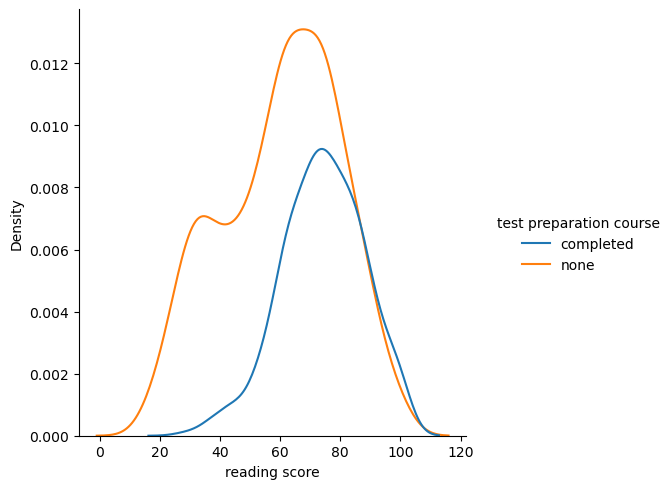

In [54]:
#reading score distribution based on test preparation course
sns.displot(df, x='reading score', hue='test preparation course', kind='kde')

### What do you find interesting?  

- To me the reading score is really intriguing --> We need to really work on understanding what is going on
- The writing score is also characteristic but in principle I am not that worried about it. 

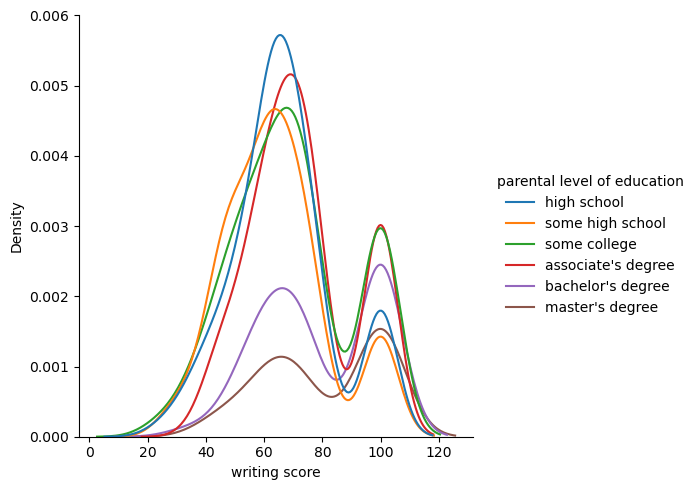

In [ ]:
#writing score distribution based on parental level of education
sns.displot(df, x='writing score', hue='parental level of education', kind='kde')
#Chosed the parental level of edutcation to analyse and see how does it behaves

#### We know for a fact that the id_student and the year will not be relevant for any analysis as they are the same value for the whole dataset

Maybe we can delete them from now on

In [56]:
#Remove id_student and year columns
df = df.drop(['id_student', 'Year'], axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,address,Age
0,M,group A,high school,standard,completed,67,67,63,NaN,14.0
1,F,group D,some high school,free/reduced,none,40,29,55,NaN,17.0
2,M,group E,some college,free/reduced,none,59,60,50,NaN,14.0
3,M,group B,high school,standard,none,77,78,68,NaN,17.0
4,M,group E,associate's degree,standard,completed,78,73,68,NaN,16.0


#### What do we care about? The grades are the main problem. Maybe they vary based on any of the other variables

I think we can detect the biggest discrepancies at 3-4 levels: 

- Parental level of education 

- Test preparation course 

- Mybe lunch or gender (I am pretty sure the lunch should not have that much impact but let's still check it)

Let's go deeper

 



### 2-variable Analysis with Lunch column 

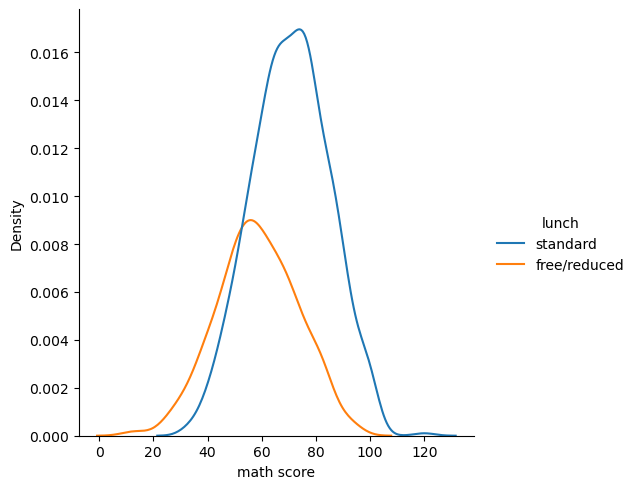

In [57]:
#Variable analysis with Lunch column
sns.displot(df, x='math score', hue='lunch', kind='kde')

### 2-variable Analysis with gender column 

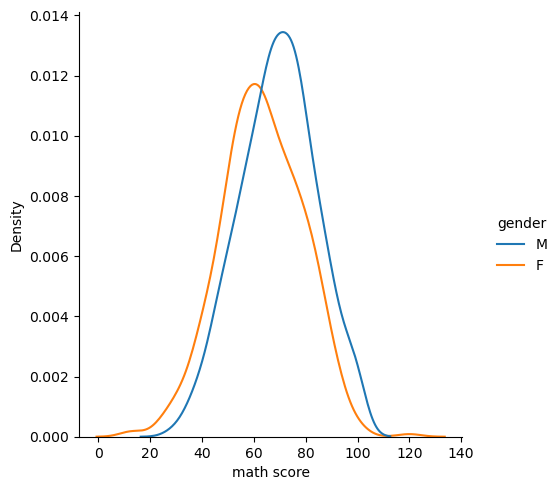

In [58]:
#Variable analysis with gender column
sns.displot(df, x='math score', hue='gender', kind='kde')

### 2-variable Analysis with Test preparation course column 

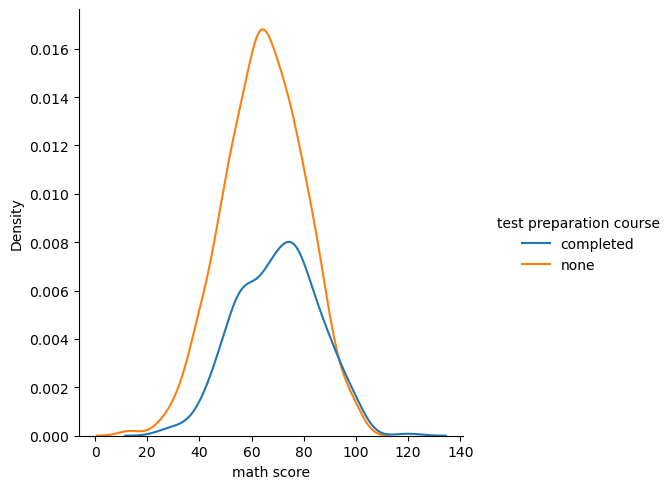

In [59]:
#Variable analysis with Test preparation course column
sns.displot(df, x='math score', hue='test preparation course', kind='kde')

### What is next?

- Get the story together
- Improve your code
- Get some statistics of the differences you want to show 
- Work on the plots to show the data nicely 
- Get the presentation ready 
- Show what you found to the client